<a href="https://colab.research.google.com/github/TimH2024/MSC-M5-Project/blob/main/6_LTSM_Timestamp_and_ensemble_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6. Timestamp and Ensemble

In [1]:
pip install tensorflow keras keras-tuner numpy pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [2]:
# Core libraries
import numpy as np
import pandas as pd

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# TensorFlow/Keras for deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Keras Tuner for hyperparameter tuning
from keras_tuner import HyperModel
from keras_tuner.tuners import RandomSearch

In [9]:
import os
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the subdirectory path
subdirectory = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data'

# Define file path for 'filtered_dataset120ML.csv' in the subdirectory
file_path = os.path.join(subdirectory, 'filtered_dataset120ML.csv')

# Check if the file exists, then load it
if os.path.exists(file_path):
    filtered_dataset120 = pd.read_csv(file_path)
    print(f"File 'filtered_dataset120ML.csv' loaded successfully!")
    print(f"DataFrame shape: {filtered_dataset120.shape}")
else:
    print(f"File 'filtered_dataset120ML.csv' not found in '{subdirectory}'. Please check the file path.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File 'filtered_dataset120ML.csv' loaded successfully!
DataFrame shape: (102229, 58)


In [20]:
import os
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the subdirectory path
subdirectory = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data'

# Define file path for 'master_results.csv' in the subdirectory
master_results_file_path = os.path.join(subdirectory, 'master_results.csv')

# Check if the file exists, then load it
if os.path.exists(master_results_file_path):
    master_results = pd.read_csv(master_results_file_path)
    print(f"File 'master_results.csv' loaded successfully!")
    print(f"DataFrame shape: {master_results.shape}")
else:
    print(f"File 'master_results.csv' not found in '{subdirectory}'. Please check the file path.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File 'master_results.csv' loaded successfully!
DataFrame shape: (16, 10)


In [14]:
print(master_results)

       Target                        Model  Train R²   Test R²           MAE  \
0   new_price            Linear Regression  0.601408  0.595691  4.716642e-01   
1   new_price      Random Forest Regressor  0.979135  0.850895  2.333770e-01   
2   new_price            XGBoost Regressor  0.832455  0.778517  3.312516e-01   
3   new_price  Gradient Boosting Regressor  0.772447  0.752945  3.536000e-01   
4          PI            Linear Regression  1.000000  1.000000  7.054472e-16   
5          PI      Random Forest Regressor  1.000000  1.000000  3.067508e-14   
6          PI            XGBoost Regressor  0.999957  0.999957  6.001523e-03   
7          PI  Gradient Boosting Regressor  1.000000  1.000000  1.008244e-08   
8   new_price                    Base LSTM  0.668216  0.666281  1.425859e+06   
9          PI                    Base LSTM  0.999555  0.999558  9.299883e-02   
10  new_price                Enhanced LSTM  0.686986  0.679755  1.390046e+06   
11         PI                Enhanced LS

In [11]:
# Define the feature matrix (X) and target variables (y)

features = filtered_dataset120.drop(columns=['new_price', 'PI'])
targets_120 = filtered_dataset120[['new_price', 'PI']]

X = features.copy()
y = targets_120.copy()

In [6]:
filtered_dataset120.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102229 entries, 0 to 102228
Data columns (total 58 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   saleable_area(ft^2)                             102229 non-null  int64  
 1   floor                                           102229 non-null  float64
 2   CG                                              102229 non-null  float64
 3   CI                                              102229 non-null  float64
 4   CPI                                             102229 non-null  float64
 5   GDP                                             102229 non-null  float64
 6   HS                                              102229 non-null  float64
 7   IR                                              102229 non-null  float64
 8   LTV                                             102229 non-null  float64
 9   M3                        

# LSTM WITH TIME STAMP

# Using the LSTM using Timestamp"
(by espressly utilising the scaled timestamp such that it is not just another feature)

Training LSTM for new_price...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0366 - mae: 0.1383 - val_loss: 0.0189 - val_mae: 0.1041
Epoch 2/10
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0202 - mae: 0.1058 - val_loss: 0.0181 - val_mae: 0.1016
Epoch 3/10
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0184 - mae: 0.1006 - val_loss: 0.0205 - val_mae: 0.1122
Epoch 4/10
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0183 - mae: 0.1001 - val_loss: 0.0169 - val_mae: 0.0967
Epoch 5/10
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0181 - mae: 0.0994 - val_loss: 0.0164 - val_mae: 0.0944
Epoch 6/10
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0175 - mae: 0.0978 - val_loss: 0.0165 - val_mae: 0.0966
Epoch 7/10
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0174 - mae: 0.0973 - val_loss: 0.0167 - val_mae: 0.0965
639/639 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


Model for new_price saved as 'optimized_lstm_new_price.h5'.


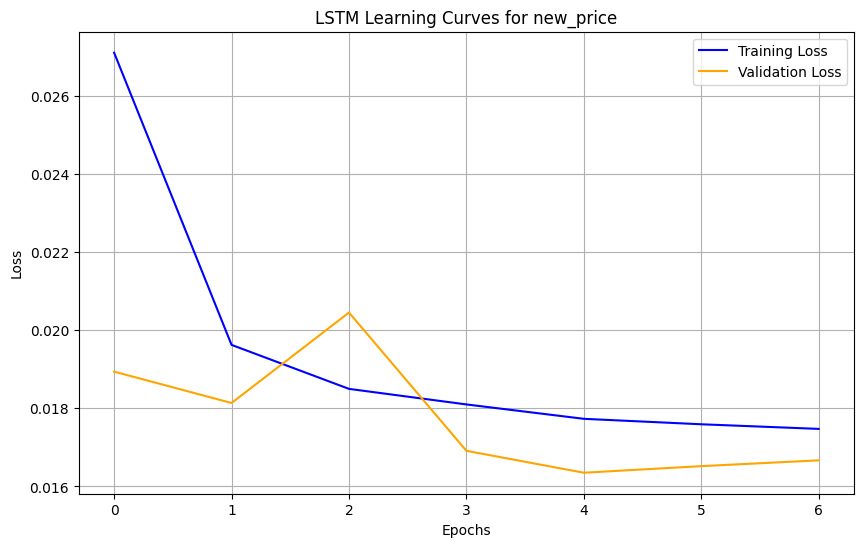

Training LSTM for PI...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2045/2045 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0529 - mae: 0.1469 - val_loss: 0.0091 - val_mae: 0.0577
Epoch 2/10
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0048 - mae: 0.0506 - val_loss: 0.0031 - val_mae: 0.0298
Epoch 3/10
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0030 - mae: 0.0393 - val_loss: 0.0017 - val_mae: 0.0295
Epoch 4/10
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0028 - mae: 0.0377 - val_loss: 0.0013 - val_mae: 0.0332
Epoch 5/10
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0028 - mae: 0.0370 - val_loss: 2.0549e-04 - val_mae: 0.0085
Epoch 6/10
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0027 - mae: 0.0367 - val_loss: 2.7107e-04 - val_mae: 0.0135
Epoch 7/10
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0027 - mae: 0.0366 - val_loss: 1.6616e-04 - val_mae: 0.0117
Epoch 8/10
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0026 - mae: 0.0363 - val_loss: 1.0441e-04 - val_mae: 0.0064
Epoch 9/10
2045/2045 ━━━━━━

Model for PI saved as 'optimized_lstm_PI.h5'.


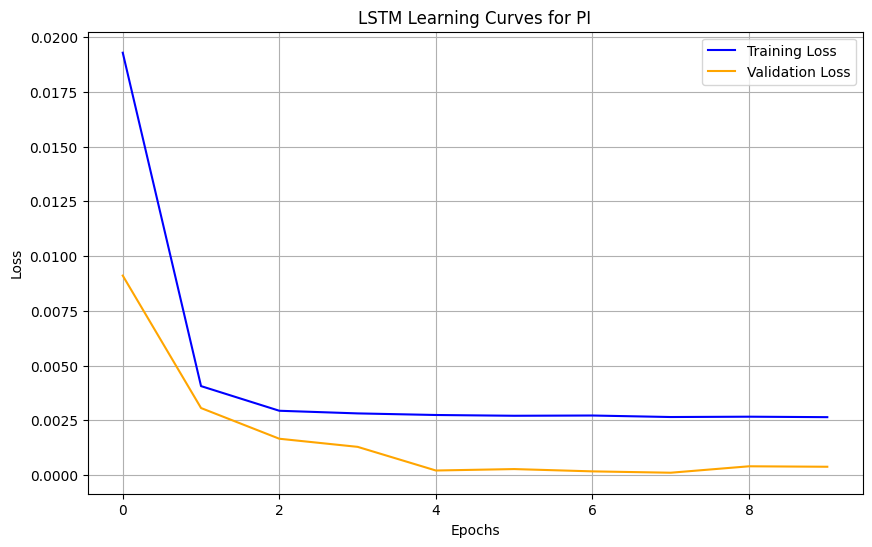

Updated results saved to 'master_results.csv'.
   Target               Model  Train R²  Test R²          MAE          MSE         RMSE      MAPE
new_price LSTM with Timestamp  0.646503 0.513864 1.855038e+06 5.308855e+12 2.304095e+06 32.303229
       PI LSTM with Timestamp  0.999382 0.000000 2.261659e-01 1.614676e-01 4.018303e-01  2.208651


<ipython-input-15-d7f2d05c0777>:150: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  master_results = pd.concat([master_results, pd.DataFrame([metrics])], ignore_index=True)


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Ensure data is sorted by Timestamp
filtered_dataset120 = filtered_dataset120.sort_values(by="Timestamp")

# Handle outliers in `new_price` (cap at 1st and 99th percentiles)
q1 = filtered_dataset120["new_price"].quantile(0.01)
q99 = filtered_dataset120["new_price"].quantile(0.99)
filtered_dataset120["new_price"] = filtered_dataset120["new_price"].clip(lower=q1, upper=q99)

# Define feature matrix (X) and target variables (y)
features = filtered_dataset120.drop(columns=["new_price", "PI"])  # Exclude targets
target_new_price = filtered_dataset120["new_price"]              # Target 1
target_PI = filtered_dataset120["PI"]                            # Target 2

# Scale the features and targets
scaler_X = MinMaxScaler()
scaled_features = scaler_X.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features, columns=features.columns)

scaler_new_price = MinMaxScaler()
scaler_PI = MinMaxScaler()

target_new_price_scaled = scaler_new_price.fit_transform(target_new_price.values.reshape(-1, 1))
target_PI_scaled = scaler_PI.fit_transform(target_PI.values.reshape(-1, 1))

# Train-test split without shuffling (to maintain temporal order)
X_train, X_test, y_train_new_price, y_test_new_price = train_test_split(
    scaled_features, target_new_price_scaled, test_size=0.2, random_state=42, shuffle=False
)
X_train, X_val, y_train_new_price, y_val_new_price = train_test_split(
    X_train, y_train_new_price, test_size=0.2, random_state=42, shuffle=False
)

X_train_PI, X_test_PI, y_train_PI, y_test_PI = train_test_split(
    scaled_features, target_PI_scaled, test_size=0.2, random_state=42, shuffle=False
)
X_train_PI, X_val_PI, y_train_PI, y_val_PI = train_test_split(
    X_train_PI, y_train_PI, test_size=0.2, random_state=42, shuffle=False
)

# Reshape data for LSTM (timesteps=1, features=n_features)
X_train = np.expand_dims(X_train.values, axis=1)
X_val = np.expand_dims(X_val.values, axis=1)
X_test = np.expand_dims(X_test.values, axis=1)

X_train_PI = np.expand_dims(X_train_PI.values, axis=1)
X_val_PI = np.expand_dims(X_val_PI.values, axis=1)
X_test_PI = np.expand_dims(X_test_PI.values, axis=1)

# Define the LSTM model with reduced complexity and increased dropout
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=32, return_sequences=True, input_shape=input_shape))  # Reduced units
    model.add(Dropout(0.3))  # Increased dropout
    model.add(LSTM(units=16, return_sequences=False))  # Reduced units
    model.add(Dropout(0.3))  # Increased dropout
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mae"])
    return model

# Train and evaluate the LSTM model for each target
results = {}

for target, (X_train_target, X_val_target, X_test_target, y_train, y_val, y_test, scaler) in {
    "new_price": (X_train, X_val, X_test, y_train_new_price, y_val_new_price, y_test_new_price, scaler_new_price),
    "PI": (X_train_PI, X_val_PI, X_test_PI, y_train_PI, y_val_PI, y_test_PI, scaler_PI),
}.items():
    print(f"Training LSTM for {target}...")

    # Build the model
    model = build_lstm_model(input_shape=(X_train_target.shape[1], X_train_target.shape[2]))

    # Use early stopping for faster training
    early_stopping = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train_target, y_train,
        validation_data=(X_val_target, y_val),
        epochs=10,  # Reduced epochs
        batch_size=32,
        verbose=1,
        callbacks=[early_stopping],
    )

    # Evaluate the model
    y_pred_scaled = model.predict(X_test_target).flatten()
    y_test_scaled = y_test.flatten()

    # Inverse transform predictions and actual values
    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    y_test = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2_train = r2_score(scaler.inverse_transform(y_train), scaler.inverse_transform(model.predict(X_train_target)))
    r2_test = r2_score(y_test, y_pred)

    nonzero_indices = y_test != 0
    mape = np.mean(np.abs((y_test[nonzero_indices] - y_pred[nonzero_indices]) / y_test[nonzero_indices])) * 100 if np.any(nonzero_indices) else np.nan

    # Save results for this target
    results[target] = {
        "Target": target,
        "Model": "LSTM with Timestamp",
        "Train R²": r2_train,
        "Test R²": r2_test,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
    }

    # Save the model
    model.save(f"optimized_lstm_{target}.h5")
    print(f"Model for {target} saved as 'optimized_lstm_{target}.h5'.")

    # Plot training curves
    plt.figure(figsize=(10, 6))
    plt.plot(history.history["loss"], label="Training Loss", color="blue")
    plt.plot(history.history["val_loss"], label="Validation Loss", color="orange")
    plt.title(f"LSTM Learning Curves for {target}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# Dynamically update `master_results.csv`
try:
    master_results = pd.read_csv("master_results.csv")
except FileNotFoundError:
    master_results = pd.DataFrame(columns=[
        "Target", "Model", "Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE"
    ])

for target, metrics in results.items():
    master_results = pd.concat([master_results, pd.DataFrame([metrics])], ignore_index=True)

master_results.to_csv("master_results.csv", index=False)
print("Updated results saved to 'master_results.csv'.")
print(master_results.to_string(index=False))

# STACKING ENSEMBLING TECHNIQUE

In [16]:
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tabulate import tabulate

# 1. Load and preprocess data
filtered_dataset120 = filtered_dataset120.sort_values(by="Timestamp")

# Handle outliers
q1 = filtered_dataset120["new_price"].quantile(0.01)
q99 = filtered_dataset120["new_price"].quantile(0.99)
filtered_dataset120["new_price"] = filtered_dataset120["new_price"].clip(lower=q1, upper=q99)

# Define features and targets
features = filtered_dataset120.drop(columns=["new_price", "PI"])  # Exclude targets
target_new_price = filtered_dataset120["new_price"]
target_PI = filtered_dataset120["PI"]

# Scale features and targets
scaler_X = MinMaxScaler()
scaled_features = scaler_X.fit_transform(features)

scaler_new_price = MinMaxScaler()
scaler_PI = MinMaxScaler()

target_new_price_scaled = scaler_new_price.fit_transform(target_new_price.values.reshape(-1, 1))
target_PI_scaled = scaler_PI.fit_transform(target_PI.values.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train_new_price, y_test_new_price = train_test_split(
    scaled_features, target_new_price_scaled, test_size=0.2, random_state=42, shuffle=False
)
X_train, X_val, y_train_new_price, y_val_new_price = train_test_split(
    X_train, y_train_new_price, test_size=0.2, random_state=42, shuffle=False
)

# Same for PI
X_train, X_test, y_train_PI, y_test_PI = train_test_split(
    scaled_features, target_PI_scaled, test_size=0.2, random_state=42, shuffle=False
)
X_train, X_val, y_train_PI, y_val_PI = train_test_split(
    X_train, y_train_PI, test_size=0.2, random_state=42, shuffle=False
)

# 2. Define base models and meta-learner
base_models = [
    ("xgb", XGBRegressor(n_jobs=-1)),
    ("rf", RandomForestRegressor(n_jobs=-1)),
    ("gbr", GradientBoostingRegressor()),
]
meta_learner = LinearRegression()

# 3. Stacking Regressor for `new_price`
stacking_model_new_price = StackingRegressor(estimators=base_models, final_estimator=meta_learner, n_jobs=-1)
stacking_model_new_price.fit(X_train, y_train_new_price)

# Stacking Regressor for `PI`
stacking_model_PI = StackingRegressor(estimators=base_models, final_estimator=meta_learner, n_jobs=-1)
stacking_model_PI.fit(X_train, y_train_PI)

# 4. Evaluate the Stacking Models
def evaluate_model(scaler_target, y_test, stacking_model, X_test):
    """Evaluate model and return results."""
    stacking_preds = stacking_model.predict(X_test)
    stacking_preds_inverse = scaler_target.inverse_transform(stacking_preds.reshape(-1, 1)).flatten()
    y_test_inverse = scaler_target.inverse_transform(y_test.reshape(-1, 1)).flatten()

    mse = mean_squared_error(y_test_inverse, stacking_preds_inverse)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_inverse, stacking_preds_inverse)
    r2 = r2_score(y_test_inverse, stacking_preds_inverse)
    nonzero_indices = y_test_inverse != 0
    mape = np.mean(
        np.abs((y_test_inverse[nonzero_indices] - stacking_preds_inverse[nonzero_indices]) / y_test_inverse[nonzero_indices])
    ) * 100

    return {
        "Train R²": stacking_model.score(X_train, y_train_new_price),
        "Test R²": r2,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
    }

# Evaluate for `new_price`
results_new_price = evaluate_model(scaler_new_price, y_test_new_price, stacking_model_new_price, X_test)
results_new_price["Target"] = "new_price"
results_new_price["Model"] = "Stacking Ensemble"

# Evaluate for `PI`
results_PI = evaluate_model(scaler_PI, y_test_PI, stacking_model_PI, X_test)
results_PI["Target"] = "PI"
results_PI["Model"] = "Stacking Ensemble"

# 5. Save results dynamically to master_results.csv
try:
    master_results = pd.read_csv("master_results.csv")
except FileNotFoundError:
    master_results = pd.DataFrame(columns=["Target", "Model", "Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE"])

# Concatenate results and drop duplicates
new_results = pd.DataFrame([results_new_price, results_PI])
master_results = pd.concat([master_results, new_results], ignore_index=True)
master_results = master_results.drop_duplicates(subset=["Target", "Model"], keep="last")
master_results.to_csv("master_results.csv", index=False)

# 6. Display final results table (including all models)
print("Updated Master Results Table (with Stacking Ensemble for `new_price` and `PI`):")
print(master_results.to_string(index=False))

# Visualize the results as a table
print("\nComparison of All Machine Learning Models:")
print(tabulate(master_results, headers="keys", tablefmt="pretty"))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Updated Master Results Table (with Stacking Ensemble for `new_price` and `PI`):
   Target               Model  Train R²  Test R²          MAE          MSE         RMSE      MAPE
new_price LSTM with Timestamp  0.646503 0.513864 1.855038e+06 5.308855e+12 2.304095e+06 32.303229
       PI LSTM with Timestamp  0.999382 0.000000 2.261659e-01 1.614676e-01 4.018303e-01  2.208651
new_price   Stacking Ensemble  0.864758 0.622108 1.484192e+06 4.126848e+12 2.031464e+06 22.620323
       PI   Stacking Ensemble -3.784115 0.000000 5.398981e+00 2.914900e+01 5.398981e+00 52.724425

Comparison of All Machine Learning Models:
+---+-----------+---------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+
|   |  Target   |        Model        |      Train R²      |      Test R²      |        MAE         |        MSE         |        RMSE        |        MAPE        |
+---+-----------+---------------------+-----------------

# BI DIRECTIONAL MODEL

Dataset loaded successfully with shape: (102229, 58)
Training Bidirectional LSTM for target: new_price
Rolling features created. Sample data:
   saleable_area(ft^2)  floor   CG    CI  CPI   GDP      HS    IR  LTV    M3  \
0                  423   22.0  9.1  66.1  2.0  91.4  5250.0  4.75  0.5  16.5   
1                  761   12.0  9.1  66.1  2.0  91.4  5250.0  4.75  0.5  16.5   
2                  320   12.0  9.1  66.1  2.0  91.4  5250.0  4.75  0.5  16.5   
3                  519   29.0  9.1  66.1  2.0  91.4  5250.0  4.75  0.5  16.5   
4                  699   24.0  9.1  66.1  2.0  91.4  5250.0  4.75  0.5  16.5   

   ...  rolling_min_3  rolling_max_3  rolling_mean_5  rolling_std_5  \
0  ...            0.0            0.0             0.0   0.000000e+00   
1  ...            0.0            0.0             0.0   0.000000e+00   
2  ...      4389440.0     12067177.0             0.0   0.000000e+00   
3  ...      4389440.0     12067177.0             0.0   0.000000e+00   
4  ...      4389440.0 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
2237/2237 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - loss: 0.0332 - mae: 0.1357 - val_loss: 0.0247 - val_mae: 0.1148
Epoch 2/15
2237/2237 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - loss: 0.0293 - mae: 0.1277 - val_loss: 0.0244 - val_mae: 0.1169
Epoch 3/15
2237/2237 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - loss: 0.0288 - mae: 0.1267 - val_loss: 0.0252 - val_mae: 0.1197
Epoch 4/15
2237/2237 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - loss: 0.0285 - mae: 0.1262 - val_loss: 0.0245 - val_mae: 0.1173
Epoch 5/15
2237/2237 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - loss: 0.0281 - mae: 0.1252 - val_loss: 0.0243 - val_mae: 0.1157
Epoch 6/15
2237/2237 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - loss: 0.0286 - mae: 0.1262 - val_loss: 0.0247 - val_mae: 0.1196
Epoch 7/15
2237/2237 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - loss: 0.0282 - mae: 0.1250 - val_loss: 0.0245 - val_mae: 0.1157
Epoch 8/15
2237/2237 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - loss: 0.0284 - mae: 0.1257 - val_loss: 0.0245 - val_mae: 0.1152
Epoch 9/15
2237/2237 ━━━

Model saved as 'bidirectional_lstm_new_price.h5'
Training Bidirectional LSTM for target: PI
Rolling features created. Sample data:
   saleable_area(ft^2)  floor   CG    CI  CPI   GDP      HS    IR  LTV    M3  \
0                  423   22.0  9.1  66.1  2.0  91.4  5250.0  4.75  0.5  16.5   
1                  761   12.0  9.1  66.1  2.0  91.4  5250.0  4.75  0.5  16.5   
2                  320   12.0  9.1  66.1  2.0  91.4  5250.0  4.75  0.5  16.5   
3                  519   29.0  9.1  66.1  2.0  91.4  5250.0  4.75  0.5  16.5   
4                  699   24.0  9.1  66.1  2.0  91.4  5250.0  4.75  0.5  16.5   

   ...  rolling_min_3  rolling_max_3  rolling_mean_5  rolling_std_5  \
0  ...           0.00           0.00            0.00            0.0   
1  ...           0.00           0.00            0.00            0.0   
2  ...         -10.24         -10.24            0.00            0.0   
3  ...         -10.24         -10.24            0.00            0.0   
4  ...         -10.24         -10

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
2237/2237 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - loss: 0.0113 - mae: 0.0651 - val_loss: 0.0015 - val_mae: 0.0276
Epoch 2/15
2237/2237 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - loss: 0.0026 - mae: 0.0352 - val_loss: 9.5662e-04 - val_mae: 0.0237
Epoch 3/15
2237/2237 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - loss: 0.0021 - mae: 0.0319 - val_loss: 6.7177e-04 - val_mae: 0.0167
Epoch 4/15
2237/2237 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - loss: 0.0020 - mae: 0.0308 - val_loss: 4.8358e-04 - val_mae: 0.0145
Epoch 5/15
2237/2237 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - loss: 0.0019 - mae: 0.0298 - val_loss: 3.8711e-04 - val_mae: 0.0090
Epoch 6/15
2237/2237 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - loss: 0.0018 - mae: 0.0292 - val_loss: 7.4645e-04 - val_mae: 0.0196
Epoch 7/15
2237/2237 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - loss: 0.0018 - mae: 0.0285 - val_loss: 5.4020e-04 - val_mae: 0.0163
Epoch 8/15
2237/2237 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - loss: 0.0017 - mae: 0.0282 - val_loss: 3.4942e-04 - val_mae: 0.0

Model saved as 'bidirectional_lstm_PI.h5'

Updated Results from 'master_results.csv':
   Target               Model  Train R²  Test R²          MAE          MSE         RMSE      MAPE  Train R² (new_price)  Test R² (new_price)  MAE (new_price)  Train R² (PI)  Test R² (PI)  MAE (PI)
new_price LSTM with Timestamp  0.646503 0.513864 1.855038e+06 5.308855e+12 2.304095e+06 32.303229                   NaN                  NaN              NaN            NaN           NaN       NaN
       PI LSTM with Timestamp  0.999382 0.000000 2.261659e-01 1.614676e-01 4.018303e-01  2.208651                   NaN                  NaN              NaN            NaN           NaN       NaN
new_price   Stacking Ensemble  0.864758 0.622108 1.484192e+06 4.126848e+12 2.031464e+06 22.620323                   NaN                  NaN              NaN            NaN           NaN       NaN
       PI   Stacking Ensemble -3.784115 0.000000 5.398981e+00 2.914900e+01 5.398981e+00 52.724425                   NaN       

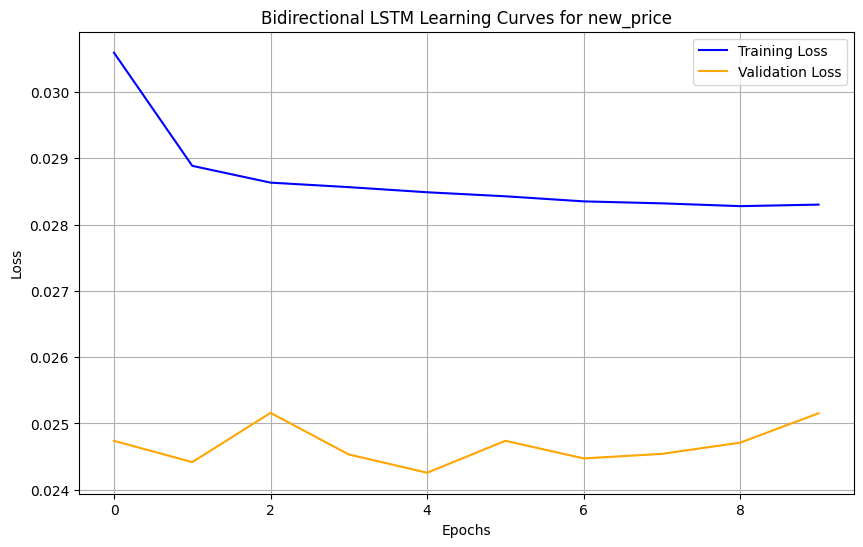

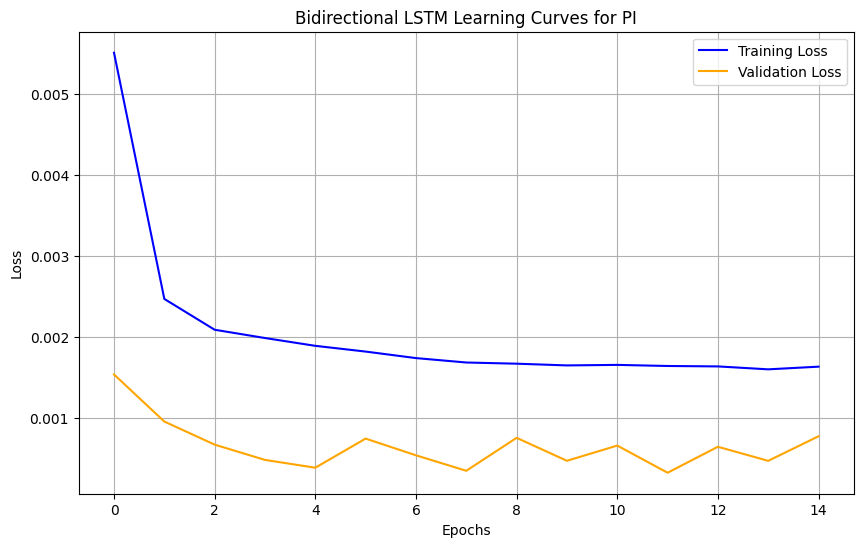

In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Generate rolling statistics and lag features
def create_rolling_features(df, target_column, lags=[1, 2, 3], rolling_windows=[3, 5, 10]):
    for lag in lags:
        df[f"lag_{lag}"] = df[target_column].shift(lag)
    for window in rolling_windows:
        df[f"rolling_mean_{window}"] = df[target_column].rolling(window=window).mean()
        df[f"rolling_std_{window}"] = df[target_column].rolling(window=window).std()
        df[f"rolling_min_{window}"] = df[target_column].rolling(window=window).min()
        df[f"rolling_max_{window}"] = df[target_column].rolling(window=window).max()
    df.fillna(0, inplace=True)  # Handle NaN values
    print("Rolling features created. Sample data:")
    print(df.head())  # Debugging: Check rolling features
    return df

# Create sequences for LSTM input
def create_sequences(data, target, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(target[i + sequence_length])
    X, y = np.array(X), np.array(y)
    print(f"Sequences created with shapes: X={X.shape}, y={y.shape}")  # Debugging: Check sequence shapes
    return X, y

# Build the improved Bidirectional LSTM model
def build_improved_bidirectional_lstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=input_shape))
    model.add(Dropout(0.4))
    model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
    model.add(Dropout(0.4))
    model.add(Bidirectional(LSTM(units=32, return_sequences=False)))
    model.add(Dropout(0.4))
    model.add(Dense(units=128, activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(units=1))
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

# Train and evaluate the model for a given target
def train_and_evaluate_bidirectional_lstm(target_column, sequence_length=10, epochs=15):
    print(f"Training Bidirectional LSTM for target: {target_column}")

    # Generate rolling statistics
    data = create_rolling_features(filtered_dataset120ML.copy(), target_column)

    # Normalize features and target
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(data.drop(columns=[target_column]))
    scaled_target = scaler.fit_transform(data[[target_column]])
    print("Features and target scaled.")  # Debugging: Confirm scaling

    # Create sequences
    X, y = create_sequences(scaled_features, scaled_target, sequence_length)

    # Split into train, validation, and test sets
    train_size = int(0.7 * len(X))
    val_size = int(0.15 * len(X))
    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
    X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]
    print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")  # Debugging: Check splits

    # Build and train the model
    model = build_improved_bidirectional_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
    early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate the model
    y_pred_scaled = model.predict(X_test).flatten()
    y_test_scaled = y_test.flatten()
    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    y_test = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
    print(f"Sample predictions: {y_pred[:10]}")  # Debugging: Check predictions
    print(f"Sample actual values: {y_test[:10]}")  # Debugging: Check actual values

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2_train = r2_score(scaler.inverse_transform(y_train), scaler.inverse_transform(model.predict(X_train)))
    r2_test = r2_score(y_test, y_pred)
    nonzero_indices = y_test != 0
    mape = (
        np.mean(np.abs((y_test[nonzero_indices] - y_pred[nonzero_indices]) / y_test[nonzero_indices])) * 100
        if np.any(nonzero_indices) else np.nan
    )

    # Save model
    model.save(f"bidirectional_lstm_{target_column}.h5")
    print(f"Model saved as 'bidirectional_lstm_{target_column}.h5'")

    # Return results
    return {
        "Target": target_column,
        "Train R²": r2_train,
        "Test R²": r2_test,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
    }, history

# Load dataset
file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/filtered_dataset120ML.csv'
filtered_dataset120ML = pd.read_csv(file_path)
print(f"Dataset loaded successfully with shape: {filtered_dataset120ML.shape}")

# Train and evaluate for both `new_price` and `PI`
results = {}
history_dict = {}
for target in ["new_price", "PI"]:
    result, history = train_and_evaluate_bidirectional_lstm(target_column=target)
    results[target] = result
    history_dict[target] = history

# Update master_results.csv
try:
    master_results = pd.read_csv("master_results.csv")
except FileNotFoundError:
    master_results = pd.DataFrame(columns=[
        "Model", "Train R² (new_price)", "Test R² (new_price)", "MAE (new_price)",
        "Train R² (PI)", "Test R² (PI)", "MAE (PI)"
    ])

# Update Bidirectional LSTM row or append if not present
bidirectional_row = {
    "Model": "Bidirectional LSTM",
    "Train R² (new_price)": results["new_price"]["Train R²"],
    "Test R² (new_price)": results["new_price"]["Test R²"],
    "MAE (new_price)": results["new_price"]["MAE"],
    "Train R² (PI)": results["PI"]["Train R²"],
    "Test R² (PI)": results["PI"]["Test R²"],
    "MAE (PI)": results["PI"]["MAE"],
}

# Remove old Bidirectional LSTM row if it exists
master_results = master_results[master_results["Model"] != "Bidirectional LSTM"]
master_results = pd.concat([master_results, pd.DataFrame([bidirectional_row])], ignore_index=True)
master_results.to_csv("master_results.csv", index=False)
print("\nUpdated Results from 'master_results.csv':")
print(master_results.to_string(index=False))

# Plot training and validation loss for `new_price` and `PI`
for target, history in history_dict.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history.history["loss"], label="Training Loss", color="blue")
    plt.plot(history.history["val_loss"], label="Validation Loss", color="orange")
    plt.title(f"Bidirectional LSTM Learning Curves for {target}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# FINAL RESULTS (ALL MODELS)

In [18]:
print(master_results.head(20))
print(master_results.shape)

      Target                Model  Train R²   Test R²           MAE  \
0  new_price  LSTM with Timestamp  0.646503  0.513864  1.855038e+06   
1         PI  LSTM with Timestamp  0.999382  0.000000  2.261659e-01   
2  new_price    Stacking Ensemble  0.864758  0.622108  1.484192e+06   
3         PI    Stacking Ensemble -3.784115  0.000000  5.398981e+00   
4        NaN   Bidirectional LSTM       NaN       NaN           NaN   

            MSE          RMSE       MAPE  Train R² (new_price)  \
0  5.308855e+12  2.304095e+06  32.303229                   NaN   
1  1.614676e-01  4.018303e-01   2.208651                   NaN   
2  4.126848e+12  2.031464e+06  22.620323                   NaN   
3  2.914900e+01  5.398981e+00  52.724425                   NaN   
4           NaN           NaN        NaN              0.030313   

   Test R² (new_price)  MAE (new_price)  Train R² (PI)  Test R² (PI)  MAE (PI)  
0                  NaN              NaN            NaN           NaN       NaN  
1             